In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape 
np.random.shuffle(data)

In [3]:
data_dev = data[:1000].T
y_test = data_dev[0].astype(int)       
x_test = data_dev[1:] / 255.0           

data_train = data[1000:].T
y_train = data_train[0].astype(int)   
x_train = data_train[1:] / 255.0       

In [4]:
def initial_parameters():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(64, 128) - 0.5
    b2 = np.random.rand(64, 1) - 0.5
    w3 = np.random.rand(10, 64) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, w3, b3


def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)


def forward_propagation(W1, b1, W2, b2, w3, b3, X):
    z1 = W1.dot(X) + b1
    a1 = relu(z1)
    z2 = W2.dot(a1) + b2
    a2 = relu(z2)
    z3 = w3.dot(a2) + b3
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3


def one_hot(Y):
    one_hot_y = np.zeros((Y.size, Y.max() + 1))
    one_hot_y[np.arange(Y.size), Y.astype(int)] = 1
    return one_hot_y.T


def deriv_relu(Z):
    return Z > 0


def back_propagation(z1, a1, z2, a2, z3, a3, W2, W3, X, Y):
    m = Y.size
    one_hot_y = one_hot(Y)

    dz3 = a3 - one_hot_y
    dw3 = (1 / m) * dz3.dot(a2.T)
    db3 = (1 / m) * np.sum(dz3, axis = 1, keepdims = True)
    
    dz2 = W3.T.dot(dz3) * deriv_relu(z2)
    dw2 = (1 / m) * dz2.dot(a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = W2.T.dot(dz2) * deriv_relu(z1)
    dw1 = (1 / m) * dz1.dot(X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    
    return dw1, db1, dw2, db2, dw3, db3


def update_params(W1, b1, W2, b2, W3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    W1 = W1 - alpha * dw1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dw2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dw3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3


In [5]:
def get_predictions(a3):
    return np.argmax(a3, axis=0)


def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2, W3, b3 = initial_parameters()
    
    for i in range(iterations):
        z1, a1, z2, a2, z3, a3 = forward_propagation(W1, b1, W2, b2, W3, b3, X)
        dw1, db1, dw2, db2, dw3, db3 = back_propagation(z1, a1, z2, a2, z3, a3, W2, W3, X, Y)
        W1, b1, W2, b2, w3, b3 = update_params(W1, b1, W2, b2, W3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)
        
        if i % 50 == 0:
            predictions = get_predictions(a3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i} - Accuracy: {accuracy:.4f}")
    
    return W1, b1, W2, b2, W3, b3


In [6]:
def make_predictions(x, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, a3 = forward_propagation(w1, b1, w2, b2, w3, b3, x)
    predictions = get_predictions(a3)
    return predictions

def test_predictions(index, w1, b1, w2, b2, w3, b3):
    current_image = x_test[:, index, None]
    prediction = make_predictions(current_image, w1, b1, w2, b2, w3, b3)
    label = y_test[index]
    
    print("Label:", label)
    print("Prediction:", prediction[0])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


In [7]:
w1, b1, w2, b2, w3, b3 = gradient_descent(x_train, y_train, 500, 0.1)

Iteration: 0 - Accuracy: 0.1261
Iteration: 50 - Accuracy: 0.7474
Iteration: 100 - Accuracy: 0.8174
Iteration: 150 - Accuracy: 0.8489
Iteration: 200 - Accuracy: 0.8677
Iteration: 250 - Accuracy: 0.8799
Iteration: 300 - Accuracy: 0.8899
Iteration: 350 - Accuracy: 0.8974
Iteration: 400 - Accuracy: 0.9035
Iteration: 450 - Accuracy: 0.9083


Label: 4
Prediction: 4


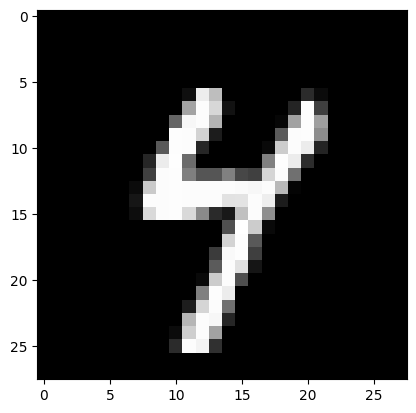

In [ ]:
test_predictions(100, w1, b1, w2, b2, w3, b3)